# Python and Linear Algebra

Insofar as data science is grounded mathematics, we have seen probability at work.  Next we should talk about linear algebra.

Think of the primary colors used in most computer graphics. If you have Red, Green and Blue as primary "directions" (we could call them vectors) then you're able to describe any color by means of a recipe: this much red, blue and green.

When you're confronted with a dataset and hope to study it for predictive power, you're looking for a minimal set of primary features, a basis, that will prove maximally determinative and let you address every data point in the corpus, without overfitting.  

What features matter most?  Linear algebra has some techniques for discovering some answers.

Imagine a postal service where you had no idea in what order the addressing elements were scrambled. The differences of greatest geographical distance, such as continent or nation, might come at the top, or somewhere in the middle. 

With linear algebra, we discover what features that we have (are able to measure), vary the most, span the greatest distance.  Then we find the next most varying coordinate (address component), such as city or zip, then the street, and so on.

Perhaps we only needed to be in the ballpark.  Actual street address or room number, or table leg is overkill, in terms of zooming in on some location.  The extra precision is of no consequence, given our marketing strategy.  So linear algebra has helped us dismiss the irrelevant.

Once we know how to order the dimensions, we know which ones we might safely dispense with. Such is one purpose of singular value decomposition (SVD), such as when used in principal components analysis, to project from higher to lower dimensional spaces.  That's what homeomorphism is all about (versus isomorphism, which doesn't allow for lossy compression).

If you didn't already know about R, G, B you might have a hard time working backwards (reverse engineering) starting from the millions of colors, to get just those three, or four in the case of C, Y, M, K.  

Given any data set, you'll be looking for the principal components, or factors, that seem to explain (predict) most of the data (future outcomes).

This idea relates to eigenvectors and eigenvalues, which stem from methods for finding the axes of rotation in a dataset, such that instead of rotating ourselves (and getting dizzy) we see more of the simpler linear relationships. 

We've like discovered a control panel or "more with less" API.

If by turning this dial, I make the lights dim, and by flipping this switch, I make something else happen, then I feel I've got my mind wrapped around a working model at last.  

I'm in the driver's seat, at least in terms of understanding the most with the least.  If I'm able to generate what appear to be believable vistas from my model (using a model to simulate new data), such as we find in the real world -- like with fractals -- then maybe I'm onto something, in terms of finally having a handle on what we're dealing with here.

Eigenvectors are the directions in which a transformation may be regarded as purely linear, and the corresponding eigenvalues have to do with by how much (designated with $\lambda$), by what scale or weight.

Before we dive in too deeply, lets add T for Transpose to our vocabulary. Given a rectangle of numbers (matrix), turning rows into columns and columns into rows, is known as transposing the matrix.

In [1]:
import numpy as np
rng = np.random.default_rng(42) # one ring to rule them all...

In [2]:
A = np.array(range(10)).reshape(2,5) # two rows, five columns
A  # show me!

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

A lot of the time, you'll have a lying down vector you'll want to stand up and "stand tall" (turn a row vector into a column vector).  Note that when numpy arrays are born, of lower life forms, such as Python lists and ranges, they have only one dimension, not even rows and columns yet.  They're not really in condition to play matrix multiplication games at all, until "hardened" with at least one row and one column.

![transpose](https://i.imgur.com/16Afrj1.gif)

In [3]:
B = A.T
B

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [4]:
limp_spaghetti = np.array(range(10))
limp_spaghetti.ndim

1

In [5]:
limp_spaghetti

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Matrix multiplication is working just fine, so I must have exaggerated.

In [6]:
limp_spaghetti @ limp_spaghetti

285

In [7]:
# means one row, take as many columns as you need
hard_spaghetti = limp_spaghetti.reshape(1, -1) 
hard_spaghetti.ndim

2

In [8]:
hard_spaghetti

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [9]:
hard_spaghetti.shape

(1, 10)

In [10]:
hard_spaghetti * hard_spaghetti # elementwise multiplication is different

array([[ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81]])

In [11]:
try:
    hard_spaghetti @ hard_spaghetti
except:
    print("No the dimensions don't work here")

No the dimensions don't work here


In [12]:
hard_spaghetti @ hard_spaghetti.T

array([[285]])

In [13]:
hard_spaghetti.T @ hard_spaghetti

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

That there (what you just witnessed) is ```@``` and/or ```__matmul__``` in action, newly an overloadable operator [in standard Python as well](https://www.python.org/dev/peps/pep-0465/). 

The all-important algorithm (credited to whom again?) is also triggered by ```np.dot(A, B)``` in the 3rd party [numpy library](https://numpy.org/doc/stable/reference/generated/numpy.dot.html), already imported up top if you were paying attention.

In theory, the 2nd dimension of the left argument has to match the first dimension of the 2nd argument.  

With an N x 1 column vector, and a 1 x M row vector (or even N, as above), that can work.  Or maybe it's an M x N matrix times an N x P matrix.  In both cases, the column dimension of the first matches the row dimension of the 2nd.

In [14]:
A_backup = A

M = 7
N = 10
P = 3

A = np.array(rng.integers(-10, 11, size = M*N)).reshape(M,N)
B = np.array(rng.integers(-10, 11, size = N*P)).reshape(N,P)
A @ B

array([[-193,  -49,   75],
       [ -81,  -52,  -31],
       [  92,  157,  -16],
       [  52,  308,   36],
       [  91,  -74, -141],
       [  66,  -20,   -5],
       [  24,  158,   33]])

In [15]:
A = np.array(rng.integers(-10, 11, size = N)).reshape(N,1)
B = np.array(rng.integers(-10, 11, size = M)).reshape(1,M)
A

array([[  7],
       [ -6],
       [  6],
       [-10],
       [  6],
       [  6],
       [  6],
       [  3],
       [ -1],
       [  4]])

In [16]:
B

array([[ -5,   6,   1,  -1,   0,   1, -10]])

In [17]:
C = A @ B
C

array([[-35,  42,   7,  -7,   0,   7, -70],
       [ 30, -36,  -6,   6,   0,  -6,  60],
       [-30,  36,   6,  -6,   0,   6, -60],
       [ 50, -60, -10,  10,   0, -10, 100],
       [-30,  36,   6,  -6,   0,   6, -60],
       [-30,  36,   6,  -6,   0,   6, -60],
       [-30,  36,   6,  -6,   0,   6, -60],
       [-15,  18,   3,  -3,   0,   3, -30],
       [  5,  -6,  -1,   1,   0,  -1,  10],
       [-20,  24,   4,  -4,   0,   4, -40]])

Just for fun lets review what it means to normalize our data columns, as before feeding to some Machine Learning algorithms, as well as to PCA itself, this step is a part of routine data cleaning.

In [18]:
from scipy.stats import zscore

In [19]:
mask = (C == 0).all(0)
column_indices = np.where(mask)[0]
# Update C to only include the columns where non-zero values occur.
C = C[:,~mask] # all rows, not these columns

In [20]:
np.round(zscore(C), 2)

array([[-0.88,  0.88,  0.88, -0.88,  0.88, -0.88],
       [ 1.45, -1.45, -1.45,  1.45, -1.45,  1.45],
       [-0.7 ,  0.7 ,  0.7 , -0.7 ,  0.7 , -0.7 ],
       [ 2.17, -2.17, -2.17,  2.17, -2.17,  2.17],
       [-0.7 ,  0.7 ,  0.7 , -0.7 ,  0.7 , -0.7 ],
       [-0.7 ,  0.7 ,  0.7 , -0.7 ,  0.7 , -0.7 ],
       [-0.7 ,  0.7 ,  0.7 , -0.7 ,  0.7 , -0.7 ],
       [-0.16,  0.16,  0.16, -0.16,  0.16, -0.16],
       [ 0.56, -0.56, -0.56,  0.56, -0.56,  0.56],
       [-0.34,  0.34,  0.34, -0.34,  0.34, -0.34]])

#### In sum...

A rectangular matrix multiplied by its own transpose gives a square matix.  

However we've seen  "multiplication" in the sense of ```@``` or ```__matmul__``` is not elementwise. Additing and subtraction would elementwise also, unless we're talking about broadcasting, a way in which numpy is smart enough to find the applicable axis.  

In the case of "matrix multiply" we really mean to take the dot product.

In other words, numpy gives us two convenient ways to take the dot product of two matrices.  

Either matrix may be only a single row or column, in which case we may refer to it as a row or column vector, or just a vector for short.

In [21]:
np.dot(A,B)

array([[-35,  42,   7,  -7,   0,   7, -70],
       [ 30, -36,  -6,   6,   0,  -6,  60],
       [-30,  36,   6,  -6,   0,   6, -60],
       [ 50, -60, -10,  10,   0, -10, 100],
       [-30,  36,   6,  -6,   0,   6, -60],
       [-30,  36,   6,  -6,   0,   6, -60],
       [-30,  36,   6,  -6,   0,   6, -60],
       [-15,  18,   3,  -3,   0,   3, -30],
       [  5,  -6,  -1,   1,   0,  -1,  10],
       [-20,  24,   4,  -4,   0,   4, -40]])

In [22]:
A @ B

array([[-35,  42,   7,  -7,   0,   7, -70],
       [ 30, -36,  -6,   6,   0,  -6,  60],
       [-30,  36,   6,  -6,   0,   6, -60],
       [ 50, -60, -10,  10,   0, -10, 100],
       [-30,  36,   6,  -6,   0,   6, -60],
       [-30,  36,   6,  -6,   0,   6, -60],
       [-30,  36,   6,  -6,   0,   6, -60],
       [-15,  18,   3,  -3,   0,   3, -30],
       [  5,  -6,  -1,   1,   0,  -1,  10],
       [-20,  24,   4,  -4,   0,   4, -40]])

Below is a way to make Jupyter Notebook code cells output all their representations instead of the last expression only.

In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [24]:
A = A_backup
A

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [25]:
B = A.T

In [26]:
A[0]             # all columns, row 0
B[:,0].flatten() # all rows, column 0

array([0, 1, 2, 3, 4])

array([0, 1, 2, 3, 4])

[What trick was that again?](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)  How did we get to see both outputs?

For reference, the options for that are 'all', 'none', 'last' and 'last_expr'.

Remember, the plain old multiplication operator, the asterisk, is an element-wise operator. 

Since the two vectors are the same, the resulting elementwise multiplication raises each element to a 2nd power.

In [27]:
A[0] * B[:,0].flatten()

array([ 0,  1,  4,  9, 16])

In this second case, the B column is different.  The dot product would sum these terms as a final operation, distilling the result to a single number.

In [28]:
B[:,1]         # all rows, column 1 (start from 0)
A[0]           # row 0 of A
A[0] * B[:,1]  # elementwise multiply
A[0] @ B[:,1]  # single number (sum of the above)

array([5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4])

array([ 0,  6, 14, 24, 36])

80

Multiplying each row of A, by each column of B, is what the plain old multiplication operator does.  The dot product would be summing the elements of each result vector and storing it in the resulting matrix.

In [29]:
A[1] * B[:,0].flatten()

array([ 0,  6, 14, 24, 36])

In [30]:
A[1] * B[:,1].flatten()

array([25, 36, 49, 64, 81])

Even though numpy provides a dot product, one could write it from scratch, making use of elementwise multiplication and np.sum internally.  The key line below is:

```python
output[i,j] = np.sum(A[i,:] * B[:,j].flatten())
```

In [31]:
def dot_product(A, B, dt=int):
    """
    multiply and sum A[i] * B[j] to get O[i,j]
    for i ranging through m rows of A, j through
    n columns of B. O will by m x n
    dt = int, float
    """
    m = A_rows = A.shape[0]
    if B.ndim==1: # lying sideways
        B = B.reshape(-1,1) # stand it up as col vector
    n = B_cols = B.shape[1]
    # if you don't want or expect integer output
    # change dtype to float
    output = np.zeros(shape=(m,n), dtype=dt)
    for i in range(A_rows):
        for j in range(B_cols):
            output[i,j] = np.sum(A[i,:] * B[:,j].flatten())
    return output

Same answer as above, using the built-in numpy function or operator.

In [32]:
dot_product(A, B)

array([[ 30,  80],
       [ 80, 255]])

In [33]:
U1 = np.array([1,2,3,4,5]).reshape(-1,1)
V1 = np.array([1,2,3,4,5]).reshape(1,5)
U1
V1

array([[1],
       [2],
       [3],
       [4],
       [5]])

array([[1, 2, 3, 4, 5]])

In [34]:
U1 @ V1
dot_product(U1, V1)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

* [Academo.org](https://academo.org/)
* [Matrix Multiply (MM) GIF](https://pages.hep.wisc.edu/~jnb/poster_group/matrix_multiply.html)
* [MM Exhibit](http://matrixmultiplication.xyz/)
![MM](https://pages.hep.wisc.edu/~jnb/poster_group/examples/matrix_times_vector_large.gif)

In [35]:
np.dot(A,B)

array([[ 30,  80],
       [ 80, 255]])

In [36]:
A @ B  # preferred

array([[ 30,  80],
       [ 80, 255]])

# Singular Value Decomposition

According to SVD, any matrix (non-square OK) may be decomposed into a dot product of three matrices:

* left hand singular vectors in an orthogonal matrix
* a diagonal matrix of singular values
* right hand singular vectors in an orthogonal matrix

These operations correspond to a rotation, a stretching in several directions, and another rotation.  

The stretching will be biggest in one direction, with other such linear transformations then ranked in order of equal or lesser magnitude.

This ranking of stretch factors, or singular values, may serve as a basis for eliminating those of lesser importance, thereby reducing the overall number of columns required of the original matrix, to get a best approximation using some number of principal components.

Some linear combination of a subset of the original columns, will make the greatest contribution to landing us in the target neighborhood of predicted clusters.  

More columns of data would not provide significantly more accuracy.  That's what we're aiming for in anycase: dimension reduction (fewer columns). 

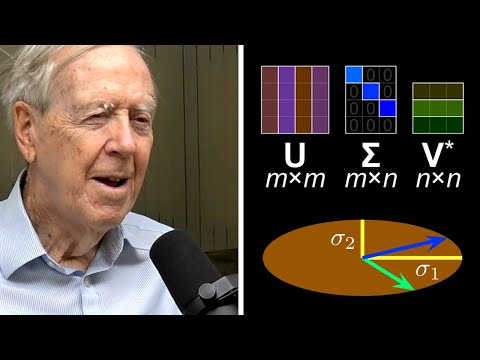

In [37]:
from IPython.display import YouTubeVideo
YouTubeVideo('YPe5OP7Clv4')

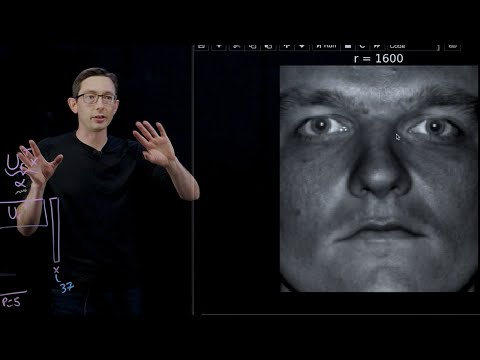

In [62]:
YouTubeVideo('SsNXg6KpLSU')

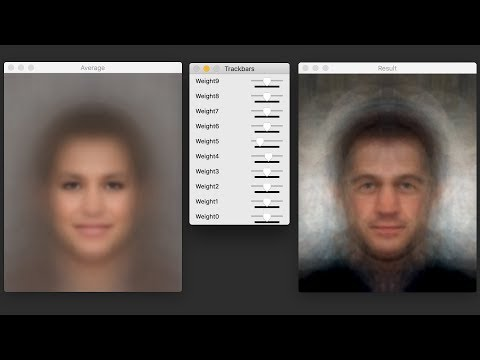

In [63]:
YouTubeVideo('J0arU2PAMls')

A first rectangular matrix.  Any will do.

In [38]:
A = np.array(range(10)).reshape(2,5)
A

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

The function below uses the native svd algorithm inside numpy, while making the returned matrices suitable for multiplying back together (dot product), thereby giving the original matrix.

In [39]:
def svd(the_matrix):
    # the matrix D needs columns of 0s 
    # to the right, up to the number of columns 
    # in the_matrix
    U, D, VT = np.linalg.svd(A, full_matrices=True)
    # add columns to the right to match number of rows of VT (same as the_matrix)
    padding = np.zeros((the_matrix.shape[0], the_matrix.shape[1] - len(D)))
    S = np.hstack([np.diag(D), padding])
    return U, S, VT

Note that rounding only affects the display, not the internals of any of this matrices.

In [40]:
U,S,VT = svd(A)
print("U =")
np.round(U, 3)
print("S =")
np.round(S, 3)
print("VT =")
np.round(VT,3)

U =


array([[-0.304, -0.953],
       [-0.953,  0.304]])

S =


array([[16.749,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  2.111,  0.   ,  0.   ,  0.   ]])

VT =


array([[-0.284, -0.359, -0.434, -0.509, -0.585],
       [ 0.721,  0.413,  0.106, -0.201, -0.508],
       [-0.355, -0.04 ,  0.87 , -0.202, -0.274],
       [-0.365,  0.358, -0.141,  0.669, -0.521],
       [-0.376,  0.755, -0.152, -0.46 ,  0.232]])

In [41]:
A_reconstructed = U @ S @ VT
np.round(A_reconstructed,2)

array([[0., 1., 2., 3., 4.],
       [5., 6., 7., 8., 9.]])

In [42]:
np.round(S*S,4)

array([[280.5444,   0.    ,   0.    ,   0.    ,   0.    ],
       [  0.    ,   4.4556,   0.    ,   0.    ,   0.    ]])

Both U and VT are what we call "orthogonal matrices" in that each times its own transpose yields the identity matrix.

In [43]:
np.round(U @ U.T, 3)

array([[1., 0.],
       [0., 1.]])

In [44]:
np.round(VT @ VT.T,3)

array([[ 1.,  0., -0.,  0., -0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [-0.,  0.,  1.,  0., -0.],
       [ 0.,  0.,  0.,  1., -0.],
       [-0.,  0., -0., -0.,  1.]])

A deeper dive into SVD shows that the matrix U is actually the eigenvectors of A dot A.T.

The eigenvectors and U (below) are the same but for column order, with the eigenvalues likewise reversed.

In [45]:
AAT = dot_product(A, A.T)
AAT_evals, AAT_evecs = np.linalg.eig(AAT) # get eigen stuff
np.round(AAT_evecs,3)
np.round(U,3)
AAT_evals

array([[-0.953, -0.304],
       [ 0.304, -0.953]])

array([[-0.304, -0.953],
       [-0.953,  0.304]])

array([  4.45562308, 280.54437692])

Remember these two eigenvalues as you'll be seeing them again. And remember S*S above.

In [46]:
np.round(S*S,4)

array([[280.5444,   0.    ,   0.    ,   0.    ,   0.    ],
       [  0.    ,   4.4556,   0.    ,   0.    ,   0.    ]])

In [47]:
AAT_evecs @ AAT_evals
np.round(U @ S, 3)

array([ -89.57904182, -265.89583537])

array([[ -5.095,  -2.011,   0.   ,   0.   ,   0.   ],
       [-15.956,   0.642,   0.   ,   0.   ,   0.   ]])

In [48]:
AAT_evecs[:,0]
dot_product(AAT, AAT_evecs[:,0], np.float)
AAT_evals[0] * AAT_evecs[:,0]

array([-0.95261622,  0.30417485])

array([[-4.24449881],
       [ 1.35528847]])

array([-4.24449881,  1.35528847])

In [49]:
ATA = A.T @ A
ATA_evals, ATA_evecs = np.linalg.eig(ATA)
np.round(ATA_evals, 3)

array([280.544,   4.456,   0.   ,   0.   ,  -0.   ])

Aha!

In [50]:
print("Same matrix computed 3 ways")
dot_product(AAT, AAT_evecs, dt=np.float)
AAT @ AAT_evecs
np.dot(AAT, AAT_evecs)
print("------------")
print("Eigenvalues:", AAT_evals)
print("Eigenvalues times Eigenvectors (same outcome):\n", AAT_evals * AAT_evecs)

Same matrix computed 3 ways


array([[  -4.24449881,  -85.334543  ],
       [   1.35528847, -267.25112384]])

array([[  -4.24449881,  -85.334543  ],
       [   1.35528847, -267.25112384]])

array([[  -4.24449881,  -85.334543  ],
       [   1.35528847, -267.25112384]])

------------
Eigenvalues: [  4.45562308 280.54437692]
Eigenvalues times Eigenvectors (same outcome):
 [[  -4.24449881  -85.334543  ]
 [   1.35528847 -267.25112384]]


Same outcome because the linear transformation of eigenvalues times eigenvectors is a $\lambda$ kind of solution, i.e. elementwise scalar multiplication is at work.  The matrix multiplies its own eigenvectors, by simply stretching them.

In [51]:
check1 = AAT @ AAT_evecs - AAT_evals * AAT_evecs
check2 = ATA @ ATA_evecs - ATA_evals * ATA_evecs
np.round(check1, 5)
np.round(check2, 5)

array([[0., 0.],
       [0., 0.]])

array([[-0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -0.,  0.,  0.],
       [-0.,  0.,  0.,  0.,  0.],
       [-0.,  0.,  0., -0.,  0.],
       [-0.,  0.,  0., -0.,  0.]])

In [52]:
A = np.array((3, 1, 1, -1, 3, 1)).reshape(2,3)
A

array([[ 3,  1,  1],
       [-1,  3,  1]])

In [53]:
U,S,VT = svd(A)

print("U =")
np.round(U, 3)
print("S =")
np.round(S, 3)
print("VT =")
np.round(VT, 3)

U =


array([[-0.707, -0.707],
       [-0.707,  0.707]])

S =


array([[3.464, 0.   , 0.   ],
       [0.   , 3.162, 0.   ]])

VT =


array([[-0.408, -0.816, -0.408],
       [-0.894,  0.447,  0.   ],
       [-0.183, -0.365,  0.913]])

In [54]:
A_reconstructed = U @ S @ VT
A_reconstructed

array([[ 3.,  1.,  1.],
       [-1.,  3.,  1.]])

* [SVD Tutorial](https://datajobs.com/data-science-repo/SVD-Tutorial-%5bKirk-Baker%5d.pdf)
* [EigenFaces with Scikit-Learn](http://jaquesgrobler.github.io/Online-Scikit-Learn-stat-tut/auto_examples/decomposition/plot_faces_decomposition.html)

In [55]:
AAT_evecs

array([[-0.95261622, -0.30417485],
       [ 0.30417485, -0.95261622]])

In [56]:
AAT

array([[ 30,  80],
       [ 80, 255]])

In [57]:
AAT @ AAT_evecs

array([[  -4.24449881,  -85.334543  ],
       [   1.35528847, -267.25112384]])

In [58]:
AAT_evals * AAT_evecs # linear

array([[  -4.24449881,  -85.334543  ],
       [   1.35528847, -267.25112384]])

In [59]:
def svd2(the_matrix):
    # the matrix D needs columns of 0s 
    # to the right, up to the number of columns 
    # in the_matrix
    U, D, VT = np.linalg.svd(A, full_matrices=False)
    # add columns to the right to match number of row of VT (same as the_matrix)
    padding = np.zeros((the_matrix.shape[0], the_matrix.shape[1] - len(D)))
    S = np.hstack([np.diag(D), padding])
    return U, S, VT

In [60]:
U,S,VT = svd2(A)
print("U =")
np.round(U, 3)
print("S =")
np.round(S, 3)
print("VT =")
np.round(VT,3)

U =


array([[-0.707, -0.707],
       [-0.707,  0.707]])

S =


array([[3.464, 0.   , 0.   ],
       [0.   , 3.162, 0.   ]])

VT =


array([[-0.408, -0.816, -0.408],
       [-0.894,  0.447,  0.   ]])

In [61]:
U[:,0].reshape(-1,1)
S[0].reshape(1,5)

array([[-0.70710678],
       [-0.70710678]])

ValueError: cannot reshape array of size 3 into shape (1,5)

In [ ]:
np.round(U[:,0].reshape(-1,1) @ S[0].reshape(1,5), 3)